In [21]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
#a) Your task is to filter out EVs that meet these criteria.
#b) Group them by the manufacturer (Make).
#c) Calculate the average battery capacity for each manufacturer. 

# Load the dataset
file_path = "FEV-data-Excel.csv"
data = pd.read_csv(file_path)

# Task 1a: Filter EVs by budget and range
filtered_data = data[(data['Minimal price (gross) [PLN]'] <= 350000) & (data['Range (WLTP) [km]'] >= 400)]

# Task 1b: Group by manufacturer
grouped_by_make = filtered_data.groupby('Make')

# Task 1c: Calculate the average battery capacity for each manufacturer
average_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean()

# Display the results
print("Filtered EVs:")
print(filtered_data[['Car full name', 'Make', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']])
print("\nAverage Battery Capacity by Manufacturer:")
print(average_battery_capacity)

Filtered EVs:
                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

    Minimal price (gross) [PLN]  Range (WLTP) [km]  
0                        345700                438  
8                        282900                460  
15                       178400                449  
18                       167990              

In [23]:
#Task 2: You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean - Energy consumption [kWh/100 km] column.

# Calculate IQR for energy consumption
q1 = data['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
q3 = data['mean - Energy consumption [kWh/100 km]'].quantile(0.75)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = data[(data['mean - Energy consumption [kWh/100 km]'] < lower_bound) |
                (data['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

# Display outliers
print("Outliers in Energy Consumption:")
print(outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']])

Outliers in Energy Consumption:
Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []


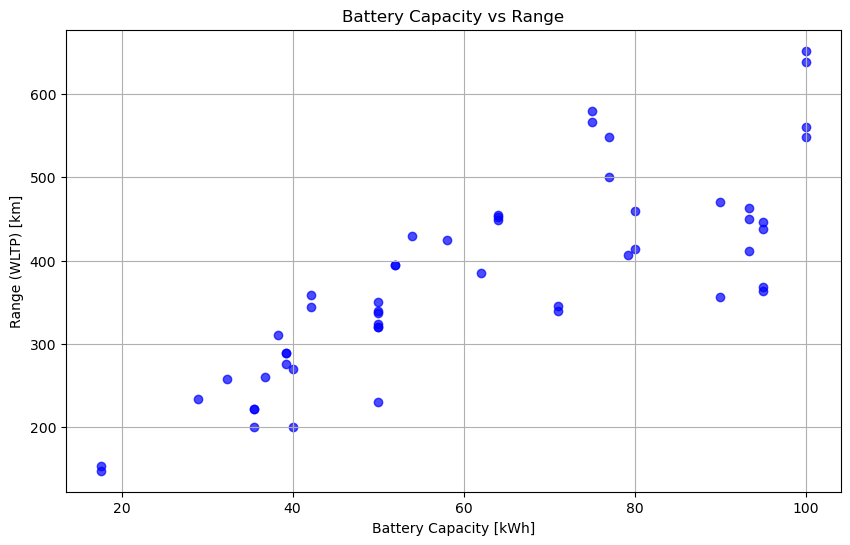

Correlation between Battery Capacity and Range: 0.8104385771936846


In [24]:
#Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
#a) Create a suitable plot to visualize.
#b) Highlight any insights.

# Task 3a: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Battery capacity [kWh]'], data['Range (WLTP) [km]'], alpha=0.7, c='blue')
plt.title('Battery Capacity vs Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True)
plt.show()

# Task 3b: Insight
correlation = data['Battery capacity [kWh]'].corr(data['Range (WLTP) [km]'])
print(f"Correlation between Battery Capacity and Range: {correlation}")

In [25]:
#Task 4: Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. 
#The class should then return the top three EVs matching their criteria. 
class EVRecommendation:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        recommendations = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery)
        ]
        return recommendations.nlargest(3, 'Range (WLTP) [km]')

# Instantiate the class
ev_recommender = EVRecommendation(data)

# Get recommendations
top_evs = ev_recommender.recommend(350000, 400, 50)
print("Top 3 EV Recommendations:")
print(top_evs[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']])

Top 3 EV Recommendations:
                Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
40   Tesla Model 3 Long Range                       235490                580
41  Tesla Model 3 Performance                       260490                567
48      Volkswagen ID.3 Pro S                       179990                549


In [26]:
#Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. 
#What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis.
#(Conduct a two sample t-test using ttest_ind from scipy.stats module) 

from scipy.stats import ttest_ind

# Filter data for Tesla and Audi
tesla_power = data[data['Make'] == 'Tesla']['Engine power [KM]']
audi_power = data[data['Make'] == 'Audi']['Engine power [KM]']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

# Display results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in average engine power between Tesla and Audi.")
else:
    print("No significant difference in average engine power between Tesla and Audi.")

T-statistic: 1.7939951827297178, P-value: 0.10684105068839565
No significant difference in average engine power between Tesla and Audi.
